# Solving the Double Pendulum
It is straightforward to obtain the equations of motion of the double pendulum using Lagrangian mechanics. \
Given the Kinetic Energy:
$$
T=\frac{1}{2}(m_1+m_2)l_1^2\dot{\phi_1}^2 + m_2l_1l_2\dot{\phi_1}\dot{\phi_2}\cos(\phi_1-\phi_2)+\frac{1}{2}m_2l_2^2\dot{\phi_2}^2
$$ \
and the Potential Energy:
$$
U=-(m_1+m_2)gl_1\cos(\phi_1)-m_2gl_2\cos(\phi_2)
$$ \
we can form the Lagrangian $L=T-U$ and solve the Euler Lagrange equations:
$$ \\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi_1}} = \frac{\partial L}{\partial \phi_1} \\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi_2}} = \frac{\partial L}{\partial \phi_2} 
$$ \
It is quite helpful to introduce a few parameters for simplification. If we let $M=m_1+m_2$, we have the mass-ratio parameter $\alpha=m2/M$ and the length-ratio parameter $\beta=l_1/l_2$ with the usual frequency parameters $\omega_1^2=g/l_1$ and $\omega_2=g/l_1$. If we set $g=l_1=1$, we can simplify our equations without loss of generality. Then after a quick division our equations of motion only rely on the parameters $\alpha$ and $\beta$ (we also have $\omega_2^2=\beta$). The result of this simplification are the following equations of motion:
$$
\ddot{\phi_1} + \frac{\alpha}{\beta}(\ddot{\phi_2}\cos(\phi_1-\phi_2)+\dot{\phi_2}^2\sin(\phi_1-\phi_2))+\sin(\phi_1)=0 \\
\ddot{\phi_2} + \beta(\ddot{\phi_1}\cos(\phi_1-\phi_2)-\dot{\phi_1}^2\sin(\phi_1-\phi_2)+\sin(\phi_2))=0 
$$ \
Now we need to isolate the second time derivatives so that we can feed it into the solve_ode function with ease. The result is:
$$
\ddot{\phi_1} = \frac{1}{1-\alpha\cos^2(\phi_1-\phi_2)}(-\alpha\dot{\phi_1}^2\sin(\phi_1-\phi_2)\cos(\phi_1-\phi_2) + \alpha\sin(\phi_2)\cos(\phi_1-\phi_2) - \frac{\alpha}{\beta}\dot{\phi_2}^2\sin(\phi_1-\phi_2) - \sin(\phi_1)) \\
\ddot{\phi_2} = \frac{1}{1-\alpha\cos^2(\phi_1-\phi_2)}(\alpha\dot{\phi_2}^2\sin(\phi_1-\phi_2)\cos(\phi_1-\phi_2) + \beta\sin(\phi_1)\cos(\phi_1-\phi_2) + \beta\dot{\phi_1}^2\sin(\phi_1-\phi_2) - \beta\sin(\phi_2))
$$
Now we can feed this into our solve_ode function. These equations are implemented in the DoublePendulum class below.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt


In [3]:
plt.rcParams['figure.dpi'] = 100.    
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [2]:
class DoublePendulum():
    """This double pendulum class implements the coupled ODES from the Euler Lagrange Equations (as above).
    We have set l1=g=1 so that w1=1. The equations simplify without loss of generality. 
    Parameters:
    alpha : float
        mass ratio m2/M
    beta : float 
        length ratio l1/l2 or 1/l2
     
    Methods
    -------
    dy_dt(t,y)
        Returns the right side of the differential equation in vector y, 
        given corresponding value of y.
    """
    def __init__(self, alpha=0.5, beta=1.0):
        self.alpha = alpha
        self.beta = beta
        
    def dy_dt(self, t, y):
        """Returns the RHS of [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        Parameters:
        y : float
            four component vector [phi1, dphi1/dt, phi2, dphi2/dt]
        Returns ----
        """
        trig1 = (1-self.alpha*np.cos(y[0]-y[2])**2)**(-1) #Useful for simplification of ODES
        
        return [y[1], trig1*(-self.alpha*y[1]**2*np.sin(y[0]-y[2])*np.cos(y[0]-y[2]) + \
                             self.alpha*np.sin(y[2])*np.cos(y[0]-y[2])-(self.alpha/self.beta)*y[3]**2*np.sin(y[0]-y[2]) \
                             -np.sin(y[0])), y[3], trig1*(self.alpha*y[3]**2*np.sin(y[0]-y[2])*np.cos(y[0]-y[2]) + \
                                                          self.beta*np.sin(y[0])*np.cos(y[0]-y[2]) \
                                                          +self.beta*y[1]**2*np.sin(y[0]-y[2])- self.beta*np.sin(y[2]))]
        
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot
    

Now we can check whether our solutions make any sense. First let's test the small angle approximation for equal length pendulums but where $m_2>>m_1$. The motion should be dominated by the lower mass.

In [5]:
alpha = 0.95
beta = 1.0
DP = DoublePendulum(alpha=alpha, beta=beta)

t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

phi1_0 = 0.1
phi2_0 = 0.1
phi1_dot_0 = 0.
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = DP.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

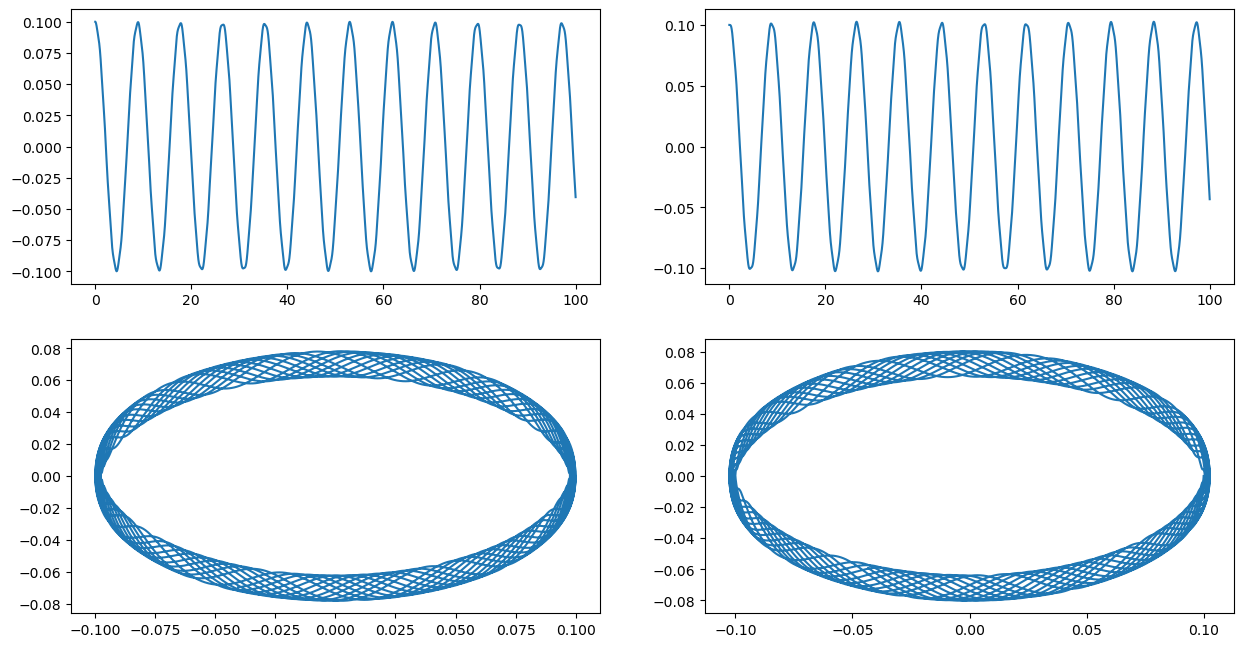

In [6]:
fig = plt.figure(figsize=(15,8))
ax_a = fig.add_subplot(2,2,1)
ax_b = fig.add_subplot(2,2,2)
ax_c = fig.add_subplot(2,2,3)
ax_d = fig.add_subplot(2,2,4)

ax_a.plot(t_pts, phi1)
ax_b.plot(t_pts, phi2)
ax_c.plot(phi1, phi1_dot)
ax_d.plot(phi2, phi2_dot)

Indeed, the plots for each angle are essentially sinusoidal (although with some ripples caused by the nonlinearities). The state space plots show an ellipse superimposed with ripples (seen as braiding). These plots tighten up as we go further into the small approximation. These are indeed what we expect from intuition. The system almost acts as a single pendulum (m1 isn't affecting the motion of m2) and they swing in unison. \
\
\
Now we can test the reverse situation where $m_1>>m_2$ and the length of the second pendulum is negligible. We set the initial conditions to have the first mass be nearly vertical. 

In [7]:
alpha = 0.01
beta = 10.0
DP = DoublePendulum(alpha=alpha, beta=beta)

t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

phi1_0 = 3.1
phi2_0 = 0.
phi1_dot_0 = 0.
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = DP.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

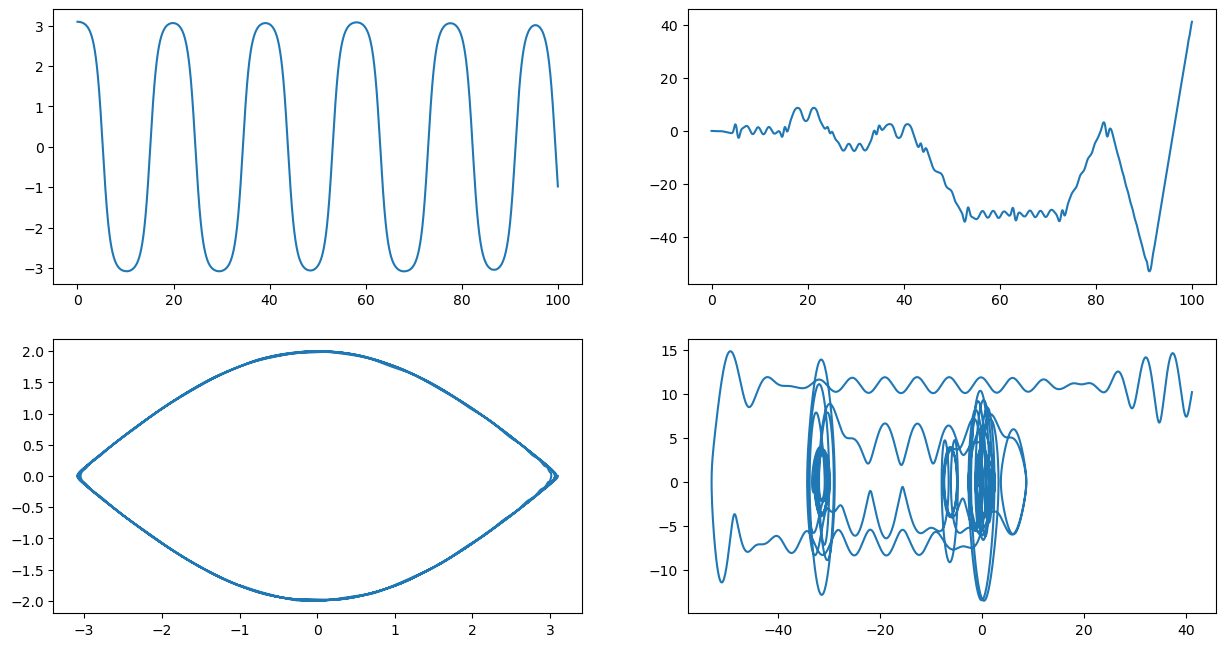

In [8]:
fig = plt.figure(figsize=(15,8))
ax_a = fig.add_subplot(2,2,1)
ax_b = fig.add_subplot(2,2,2)
ax_c = fig.add_subplot(2,2,3)
ax_d = fig.add_subplot(2,2,4)

ax_a.plot(t_pts, phi1)
ax_b.plot(t_pts, phi2)
ax_c.plot(phi1, phi1_dot)
ax_d.plot(phi2, phi2_dot)

The first mass's motion is precisely what we expect from the non-linear pendulum equation (widened sinusoidal). It's motion is unaffected by the lower mass. The lower mass however, hints at chaos. It is essentially just being tossed around violently as the upper mass swings. The state space portrait hints at a chaotic, non-repeating motion. \
\
Now let's move beyond comfortable limits or small angle approximations. We select equal length pendulums of comparable mass, with non-small angle initial conditions. 

In [9]:
alpha = 0.3
beta = 1.0
DP = DoublePendulum(alpha=alpha, beta=beta)

t_start = 0.
t_end = 1000.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

phi1_0 = 2.5
phi2_0 = 1.3
phi1_dot_0 = 0.6
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = DP.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

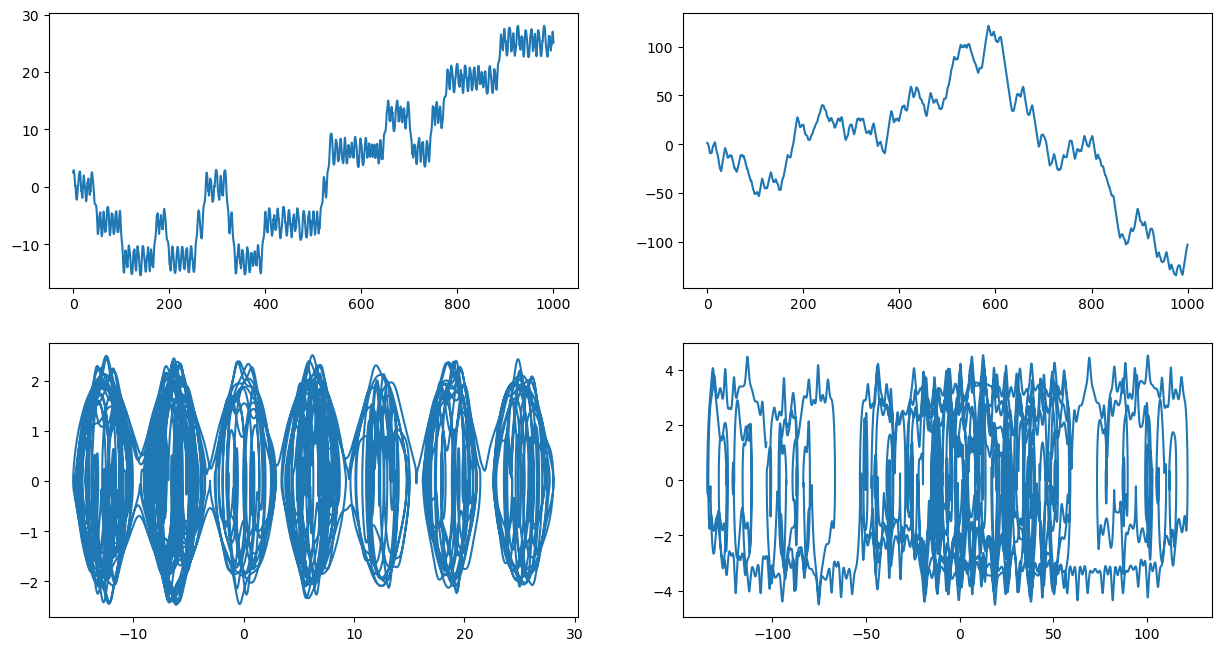

In [10]:

fig = plt.figure(figsize=(15,8))
ax_a = fig.add_subplot(2,2,1)
ax_b = fig.add_subplot(2,2,2)
ax_c = fig.add_subplot(2,2,3)
ax_d = fig.add_subplot(2,2,4)

ax_a.plot(t_pts, phi1)
ax_b.plot(t_pts, phi2)
ax_c.plot(phi1, phi1_dot)
ax_d.plot(phi2, phi2_dot)

Now the motion is apparently chaotic for each angle. The is evident from the fact that the state space orbits are non-repeating for large times. Instead, they trace a shaded region as opposed to smooth contours. To really see if this motion is chaotic, we need another diagnostic. Chaotic motion must be sensitive to initial conditions. Below we plot a log plot of $\delta\phi$ for too neighboring solutions that start out 10^-4 rad apart. 

In [11]:
alpha = 0.54
beta = 1.0
DP = DoublePendulum(alpha=alpha, beta=beta)

t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

phi1A_0 = 3.02
phi1B_0 = phi1A_0 + 0.00001
phi2_0 = 0.8
phi1_dot_0 = 0.
phi2_dot_0 = 0.

phi1A, phi1_dot, phi2, phi2_dot = DP.solve_ode(t_pts, phi1A_0, phi1_dot_0, phi2_0, phi2_dot_0)
phi1B, phi1_dot, phi2, phi2_dot = DP.solve_ode(t_pts, phi1B_0, phi1_dot_0, phi2_0, phi2_dot_0)



Text(0.5, 0, 't (sec)')

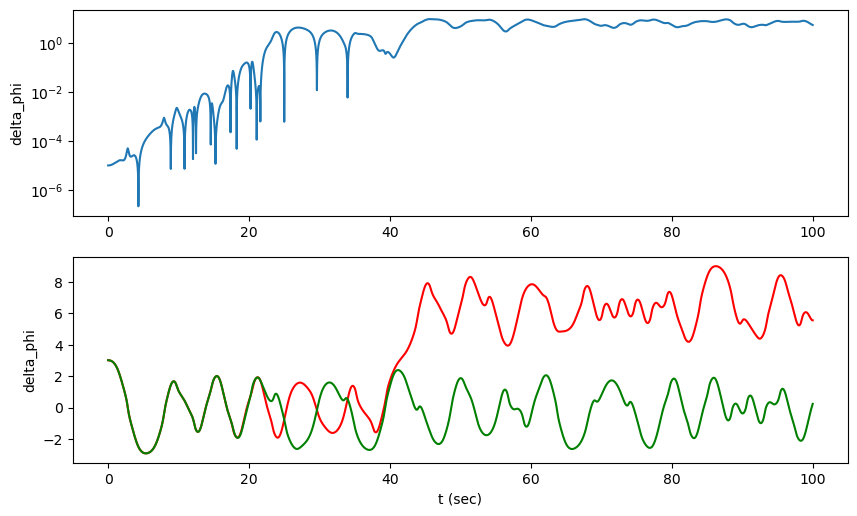

In [17]:
fig = plt.figure(figsize=(10,6))
Delta_phi = np.fabs(phi1A - phi1B)
ax_a = fig.add_subplot(2,1,1)
ax_a.set_ylabel('delta_phi')
ax_b = fig.add_subplot(2,1,2)
ax_a.semilogy(t_pts, Delta_phi)
ax_b.plot(t_pts, phi1A,'red')
ax_b.plot(t_pts, phi1B,'green')
ax_b.set_ylabel('delta_phi')
ax_b.set_xlabel('t (sec)')

In the first plot, we see linear growth (superimposed with oscillations) on a semi-log plot. This means that $\delta\phi$ is increasing exponentially (it's Liapunov exponent is positive). The second plot shows the two solutions sticking together for t<20, and then diverging after that. This exponential growth of the angle difference shows sensitivity to initial conditions. This fact along with the non-repeating motion (state space plots) corroborates that the double pendulum motion is chaotic outside of the small angle approximation. 

# Triple Pendulum
Lets try adding a third pendulum and solving using the Lagrangian method. This is somewhat messy since we have to 'uncouple' the Euler Lagrange equations, but we receive some help from linear algebra and a clever set of labels. The kinetic energy is formed by taking $\vec{r}$ for each mass, differentiating, squaring and adding. The final mass produces predictable cross terms that are similar to the double pendulum's single term. The result is:
$$
T=\frac{1}{2}(m_1+m_2+m_3)l_1^2\dot{\phi_1}^2 + \frac{1}{2}(m_2+m_3)l_2^2\dot{\phi_2}^2 + \frac{1}{2}(m_3)l_3^2\dot{\phi_3}^2 \
+(m_2+m_3)l_1l_2\dot{\phi_1}\dot{\phi_2}\cos(\phi_1-\phi_2) + m_3l_1l_3\dot{\phi_1}\dot{\phi_3}\cos(\phi_1-\phi_3) + m_3l_2l_3\dot{\phi_2}\dot{\phi_3}\cos(\phi_2-\phi_3)
$$
The potential energy is:
$$
U=-(m_1+m_2+m_3)gl_1\cos(\phi_1)-(m_2+m_3)gl_2\cos(\phi_2)-m_3gl_3\cos(\phi_3)
$$
Now we can solve the Euler Lagrange equations as we did before. There are some terms that eliminate, but the result is quite messy. Define the following parameters and then simplify the E-L eqs:
$$
\alpha = (m_2+m_3)/M \\
\beta = m_3/M \\
\gamma = l_1/l_2 \\
\delta = l_2/l_3 \\
\epsilon = l_1/l_3
$$
Actually before simplifying, we can set $l_1=g=1$ as before (without loss of generality). Then our parameters can generate any set of solutions. (We also must note that with this choice, $\delta = \epsilon/\gamma$.) Now the EL eqs are:
$$
\ddot{\phi_1}+\frac{\alpha}{\gamma}\ddot{\phi_2}\cos(\phi_1-\phi_2)+\frac{\beta}{\epsilon}\ddot{\phi_3}\cos(\phi_1-\phi_3) + \frac{\alpha}{\gamma}\dot{\phi_2}^2\sin(\phi_1-\phi_2) + \frac{\beta}{\epsilon}\dot{\phi_3}^2\sin(\phi_1-\phi_3) + \sin(\phi_1)=0 \\
\ddot{\phi_2}+\gamma\ddot{\phi_1}\cos(\phi_1-\phi_2)+\frac{\beta}{\alpha\delta}\ddot{\phi_3}\cos(\phi_2-\phi_3) - \gamma\dot{\phi_1}^2\sin(\phi_1-\phi_2) + \frac{\beta}{\alpha\delta}\dot{\phi_3}^2\sin(\phi_2-\phi_3) + \gamma\sin(\phi_2)=0 \\
\ddot{\phi_3}+\epsilon\ddot{\phi_1}\cos(\phi_1-\phi_3)+\delta\ddot{\phi_2}\cos(\phi_2-\phi_3) - \epsilon\dot{\phi_1}^2\sin(\phi_1-\phi_3) - \delta\dot{\phi_3}^2\sin(\phi_2-\phi_3) + \epsilon\sin(\phi_3)=0 \\
$$ 
Now we need to uncouple these. It isn't as simple as before when we could easily guess what multiples of each equation to add. But it helps to note that we essentially have a matrix equation:
$$
\begin{bmatrix}
1&\tilde{A}&\tilde{B} \\
\tilde{C}&1&\tilde{D} \\
\tilde{E}&\tilde{F}&1
\end{bmatrix}
*\begin{bmatrix}
\ddot{\phi_1}\\
\ddot{\phi_2}\\
\ddot{\phi_3}
\end{bmatrix} = 
\begin{bmatrix}
0&-\bar{A}&-\bar{B} \\
\bar{C}&0&-\bar{D} \\
\bar{E}&\bar{F}&0
\end{bmatrix} * 
\begin{bmatrix}
\dot{\phi_1}^2\\
\dot{\phi_2}^2\\
\dot{\phi_3}^2
\end{bmatrix} + \vec{Q}
$$
The LHS matrix uses the tilde notation where $\tilde{A}=A*\cos(\phi_m-\phi_n)$ given the mn indices of the matrix (A is the outside coefficient of phi2 in the first EL equation). The bar notation is the same, but with sines. The Q vector includes the leftover pieces like $\sin(\phi_1)$, for example. This ends up being a convenient way of packaging the equations. All we need to do is invert the LHS matrix to cast it into the form we need. In the code, I've done this a slightly different way. As opposed to dealing with a nasty determinant, I've effectively scaled the inverse by this determinant and then divided out the coefficient from the second derivative. The result of all this gives us the m coefficients in the Triplepend class. These are the coefficients that tell us which multiples of the equations we need to add to isolate each second derivative (equivalent to inverting and re-scaling). Thus,
$$
\begin{bmatrix}
1&m12&m13 \\
m21&1&m23 \\
m31&m32&1
\end{bmatrix}
*\begin{bmatrix}
EQ1\\
EQ2\\
EQ3
\end{bmatrix} = G
$$
where G is an equation that contains only a single 2nd time derivative. 

In [60]:
class TriplePendulum():
    """This triple pendulum class implements the ODES from the Euler Lagrange Equations. 
    Parameters:
    alpha : float
        mass ratio (m2+m3)/M
    beta : float 
        mass ratio m3/M
    gamma : float
        length ratio l1/l2
    delta : float
        length ratio l2/l3
    eps : float
        length ratio l1/l3
        
    Methods
    -------
    dy_dt(t,y)
        Returns the right side of the differential equation in vector y, 
        given corresponding value of y.
    """
    def __init__(self, alpha=0.667, beta=0.333, gamma=1.0, delta=1.0, eps=1.0):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.delta = delta
        self.eps = eps
        
    def dy_dt(self, t, y):
        """Returns the RHS of [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2 dphi3/dt d^2phi3/dt^2]
        Parameters:
        y : float
            six component vector [phi1, dphi1/dt, phi2, dphi2/dt, phi3, dphi3/dt]
        Returns ----
        """
        Abar = self.alpha/self.gamma * np.sin(y[0]-y[2])
        Bbar = self.beta/self.eps * np.sin(y[0]-y[4])
        Cbar = self.gamma*np.sin(y[0]-y[2])
        Dbar = self.beta/(self.alpha*self.delta)*np.sin(y[2]-y[4])
        Ebar = self.eps*np.sin(y[0]-y[4])
        Fbar = self.delta*np.sin(y[2]-y[4])
        F1 = -Abar*y[3]**2 - Bbar*y[5]**2 - np.sin(y[0])
        F2 = Cbar*y[1]**2 - Dbar*y[5]**2 - self.gamma*np.sin(y[2])
        F3 = Ebar*y[3]**2 + Fbar*y[5]**2 - self.eps*np.sin(y[4])
        
        Atil = self.alpha/self.gamma * np.cos(y[0]-y[2])
        Btil = self.beta/self.eps * np.cos(y[0]-y[4])
        Ctil = self.gamma*np.cos(y[0]-y[2])
        Dtil = self.beta/(self.alpha*self.delta)*np.cos(y[2]-y[4])
        Etil = self.eps*np.cos(y[0]-y[4])
        Ftil = self.delta*np.cos(y[2]-y[4])
        
        m12 = (-Atil + Btil*Ftil)/(1-Dtil*Ftil)
        m13 = (-Btil + Atil*Dtil)/(1-Dtil*Ftil)
        m21 = (-Ctil + Etil*Dtil)/(1-Etil*Btil)
        m23 = (-Dtil + Btil*Ctil)/(1-Etil*Btil)
        m31 = (-Etil + Ctil*Ftil)/(1-Atil*Ctil)
        m32 = (-Ftil + Etil*Atil)/(1-Atil*Ctil)
        
        
        return[y[1], (F1+m12*F2+m13*F3)/(1+m12*Ctil+m13*Etil), y[3], (m21*F1+F2+m23*F3)/(1+m21*Atil+m23*Ftil), y[5],(m31*F1+m32*F2+F3)/(m31*Btil+m32*Dtil+1)]
        
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, phi3_0, phi3_dot_0, abserr=1.0e-10, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, phi3_0, phi3_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot, phi3, phi3_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot, phi3, phi3_dot
    
    

In [65]:
alpha = 0.999
beta = 0.998
gamma = 1.0
eps = 1.0
delta = eps/gamma
TP = TriplePendulum(alpha=alpha, beta=beta, gamma=gamma, delta=delta, eps=eps)

t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

phi1_0 = 0.4
phi2_0 = 0.4
phi3_0 = 0.4
phi1_dot_0 = 0.0
phi2_dot_0 = 0.0
phi3_dot_0 = 0.0

phi1, phi1_dot, phi2, phi2_dot, phi3, phi3_dot = TP.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, phi3_0, phi3_dot_0)

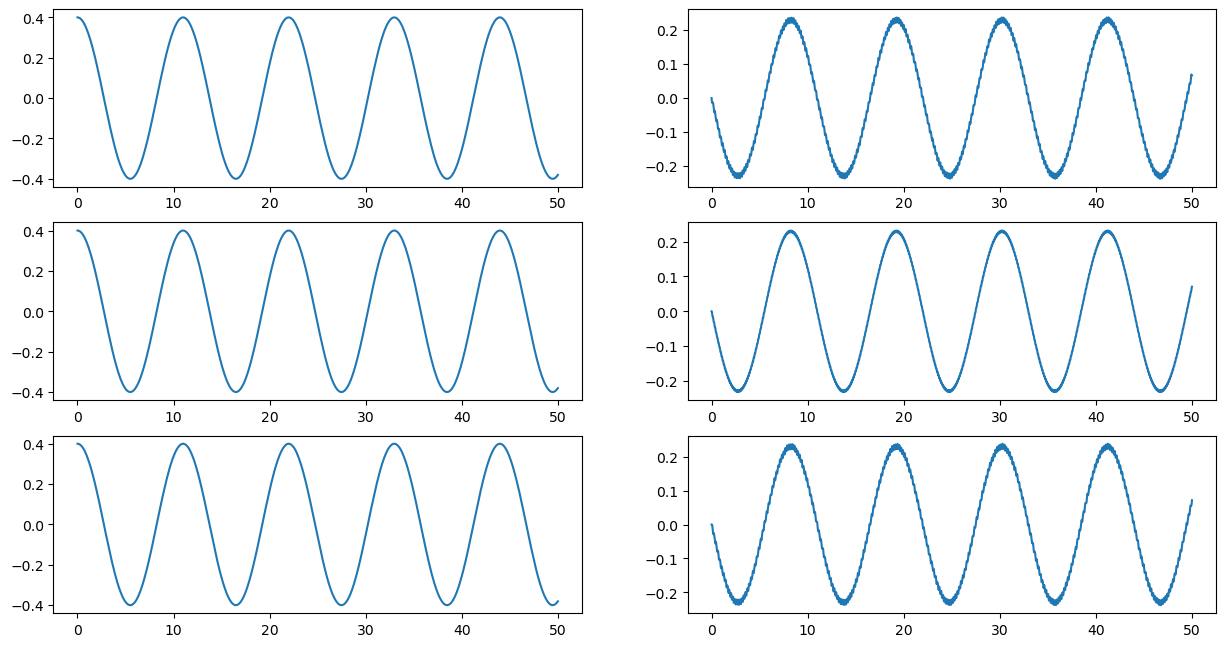

In [66]:
fig = plt.figure(figsize=(15,8))
ax_a = fig.add_subplot(3,2,1)
ax_b = fig.add_subplot(3,2,2)
ax_c = fig.add_subplot(3,2,3)
ax_d = fig.add_subplot(3,2,4)
ax_e = fig.add_subplot(3,2,5)
ax_f = fig.add_subplot(3,2,6)

ax_a.plot(t_pts, phi1)
ax_b.plot(t_pts, phi1_dot)
ax_c.plot(t_pts, phi2)
ax_d.plot(t_pts, phi2_dot)
ax_e.plot(t_pts, phi3)
ax_f.plot(t_pts, phi3_dot)

In [67]:
alpha = 0.8
beta = 0.4
gamma = 2.0
eps = 1.0
delta = eps/gamma
TP = TriplePendulum(alpha=alpha, beta=beta, gamma=gamma, delta=delta, eps=eps)

t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

phi1_0 = 0.5
phi2_0 = 0.3
phi3_0 = -0.1
phi1_dot_0 = 0.0
phi2_dot_0 = 0.4
phi3_dot_0 = 0.0

phi1, phi1_dot, phi2, phi2_dot, phi3, phi3_dot = TP.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, phi3_0, phi3_dot_0)

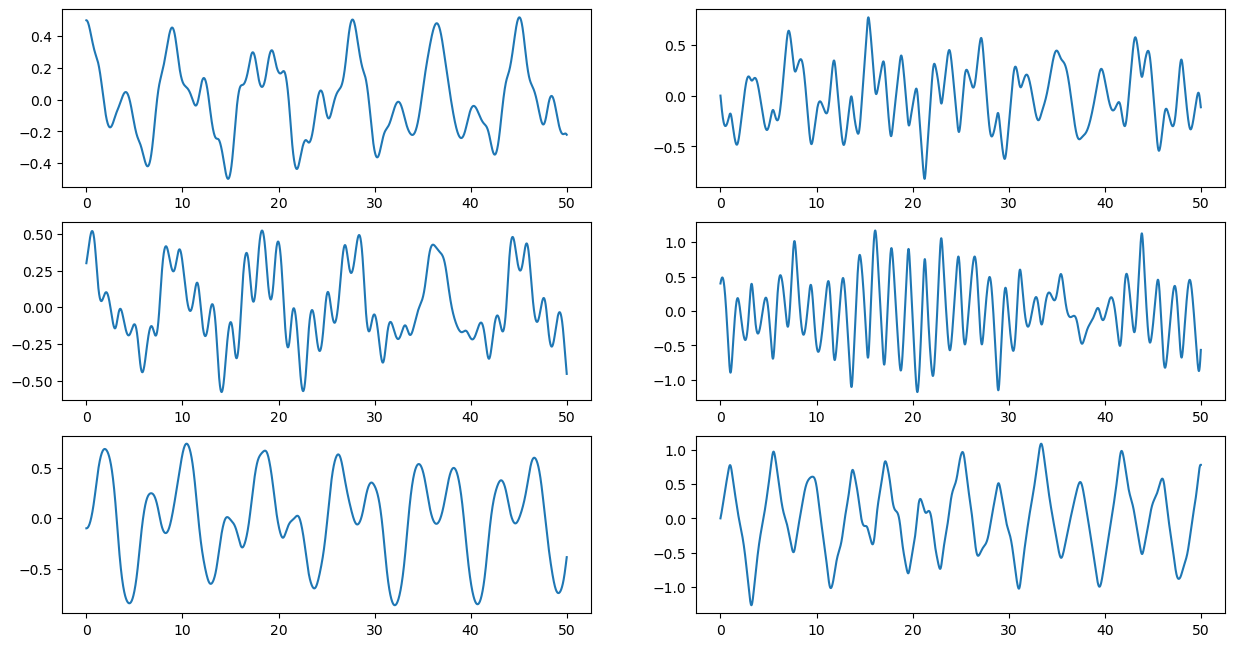

In [68]:
fig = plt.figure(figsize=(15,8))
ax_a = fig.add_subplot(3,2,1)
ax_b = fig.add_subplot(3,2,2)
ax_c = fig.add_subplot(3,2,3)
ax_d = fig.add_subplot(3,2,4)
ax_e = fig.add_subplot(3,2,5)
ax_f = fig.add_subplot(3,2,6)

ax_a.plot(t_pts, phi1)
ax_b.plot(t_pts, phi1_dot)
ax_c.plot(t_pts, phi2)
ax_d.plot(t_pts, phi2_dot)
ax_e.plot(t_pts, phi3)
ax_f.plot(t_pts, phi3_dot)